In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
plt.rcParams["figure.figsize"] = (15,5)

In [22]:
d1 = pd.read_csv('.././data/prices_round_4_day_1.csv', sep=';')
d2 = pd.read_csv('.././data/prices_round_4_day_2.csv', sep=';')
d3 = pd.read_csv('.././data/prices_round_4_day_3.csv', sep=';')

prices = pd.concat([d1, d2, d3]).fillna(0)

In [23]:
prices.head(15)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,DOLPHIN_SIGHTINGS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3047.0,0.0
1,1,0,PINA_COLADAS,15013.0,34.0,15012.0,54.0,0.0,0.0,15016.0,88.0,0.0,0.0,0.0,0.0,15014.5,0.0
2,1,0,DIP,6999.0,237.0,0.0,0.0,0.0,0.0,7001.0,237.0,0.0,0.0,0.0,0.0,7000.0,0.0
3,1,0,BAGUETTE,11999.0,90.0,0.0,0.0,0.0,0.0,12001.0,90.0,0.0,0.0,0.0,0.0,12000.0,0.0
4,1,0,PICNIC_BASKET,73358.0,12.0,73357.0,27.0,0.0,0.0,73372.0,12.0,73373.0,27.0,0.0,0.0,73365.0,0.0
5,1,0,BERRIES,3916.0,12.0,3915.0,44.0,0.0,0.0,3923.0,12.0,3924.0,44.0,0.0,0.0,3919.5,0.0
6,1,0,DIVING_GEAR,98903.0,10.0,98902.0,12.0,0.0,0.0,98905.0,10.0,98906.0,12.0,0.0,0.0,98904.0,0.0
7,1,0,BANANAS,4871.0,9.0,4870.0,23.0,0.0,0.0,4877.0,23.0,0.0,0.0,0.0,0.0,4874.0,0.0
8,1,0,COCONUTS,8003.0,200.0,0.0,0.0,0.0,0.0,8006.0,200.0,0.0,0.0,0.0,0.0,8004.5,0.0
9,1,0,PEARLS,9998.0,9.0,9995.0,23.0,0.0,0.0,10005.0,23.0,0.0,0.0,0.0,0.0,10001.5,0.0


In [24]:
# 1 picnic basket = 1 ukelele, 2 baguettes, 4 dips

dip = prices[prices['product'] == 'DIP']
bague = prices[prices['product'] == 'BAGUETTE']
uke = prices[prices['product'] == 'UKULELE']
basket = prices[prices['product'] == 'PICNIC_BASKET']

In [25]:
x100 = np.arange(0, 3000000, 100)

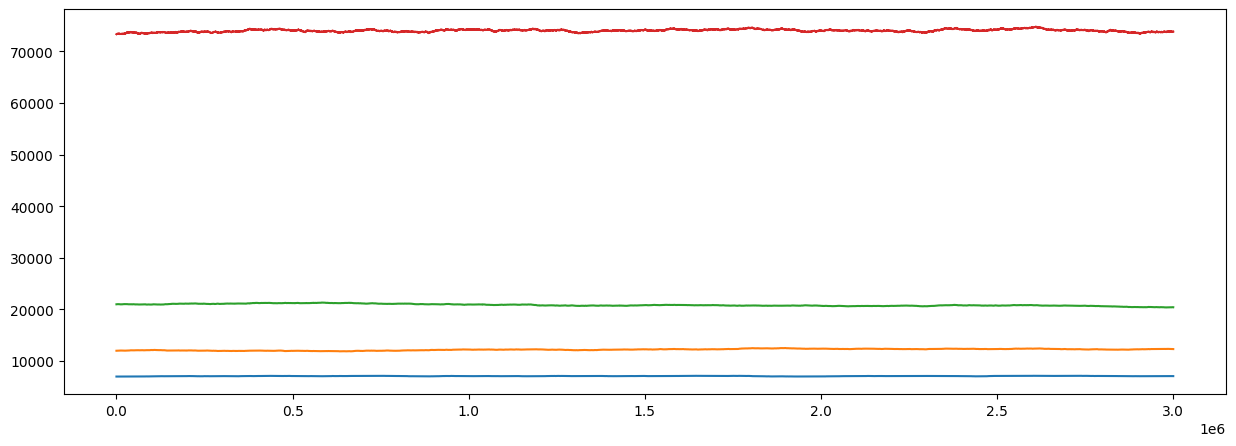

In [26]:
plt.plot(x100, dip['mid_price'])
plt.plot(x100, bague['mid_price'])
plt.plot(x100, uke['mid_price'])
plt.plot(x100, basket['mid_price'])
plt.show()

In [41]:
est_price = 4 * dip['mid_price'].to_numpy() + 2 * bague['mid_price'].to_numpy() + uke['mid_price'].to_numpy()
est_price

array([73000. , 73013. , 73019.5, ..., 73421. , 73403. , 73408.5])

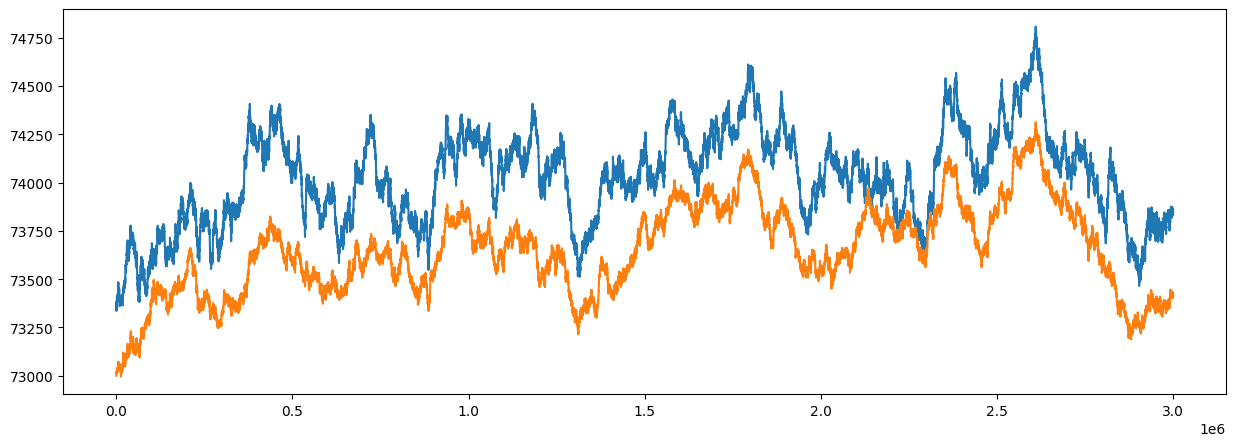

In [42]:
plt.plot(x100, basket['mid_price'])
plt.plot(x100, est_price)
plt.show()

In [43]:
nav = basket['mid_price'].to_numpy() / est_price

In [47]:
print(np.mean(nav))

1.005102471049233


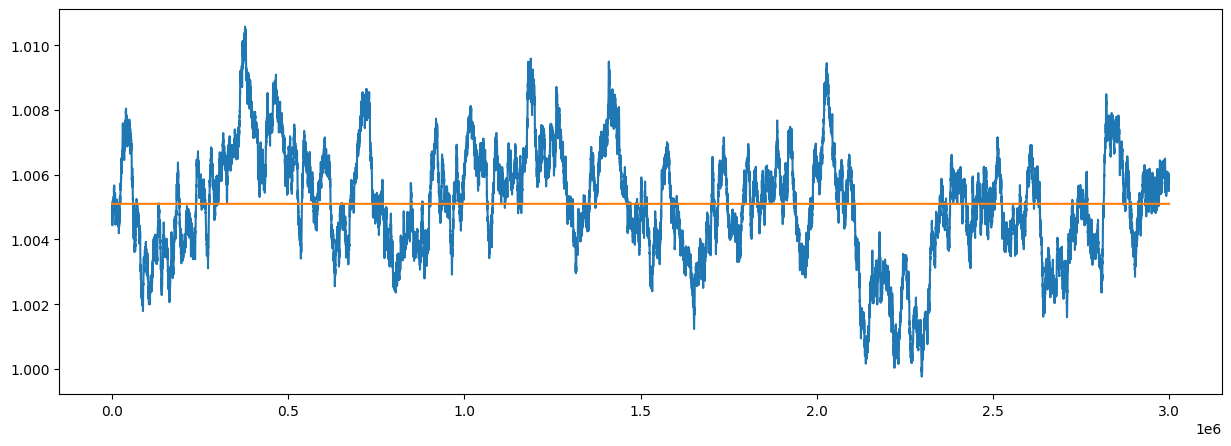

In [46]:
plt.plot(x100, nav)
plt.plot(x100, np.mean(nav) * np.ones(30000))
plt.show()